In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [ ]:
IMPUT_SIZE = 2 * 3

In [27]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n, INPUT_SIZE))
    # reshape (n, INPUT_SIZE, 1) to (n, INPUT_SIZE)
    x0 = x0.reshape(n, INPUT_SIZE)
    
    x1 = d1.sample((n, INPUT_SIZE))
    # reshape (n, INPUT_SIZE, 1) to (n, INPUT_SIZE)
    x1 = x1.reshape(n, INPUT_SIZE)
    
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [28]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [29]:
layer = nn.Linear(6, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.0282,  0.0676, -0.1010,  0.0736,  0.0188,  0.0079]), tensor(0.1376)]


In [30]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.655005
Ошибка после 1 итераций: 0.081967
Ошибка после 2 итераций: 0.045172
Ошибка после 3 итераций: 0.032040
Ошибка после 4 итераций: 0.024813
Ошибка после 5 итераций: 0.020334
Ошибка после 6 итераций: 0.017393
Ошибка после 7 итераций: 0.015222
Ошибка после 8 итераций: 0.013596
Ошибка после 9 итераций: 0.012245
Ошибка после 10 итераций: 0.011120
Ошибка после 11 итераций: 0.010315
Ошибка после 12 итераций: 0.009527
Ошибка после 13 итераций: 0.008961
Ошибка после 14 итераций: 0.008366
Ошибка после 15 итераций: 0.008015
Ошибка после 16 итераций: 0.007554
Ошибка после 17 итераций: 0.007129
Ошибка после 18 итераций: 0.006754
Ошибка после 19 итераций: 0.006514


In [36]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
dist_scale = np.linspace(-10, 10, 5000 * 6)
x_tensor = torch.tensor(dist_scale.reshape(-1, 6), dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

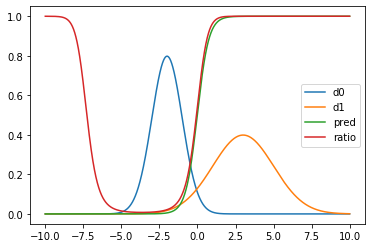

In [37]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [38]:
print([p.data[0] for p in layer.parameters()])

[tensor([0.4187, 0.4848, 0.3689, 0.4889, 0.4512, 0.4437]), tensor(0.0390)]


In [39]:
torch.log(F.sigmoid(torch.tensor(-100.)))

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(-inf)

In [40]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)